# Sensitivity Analysis Report Pipeline

In [232]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [256]:
train = pd.read_csv('/home/fjaadari/Downloads/Train (4).csv')
test = pd.read_csv('/home/fjaadari/Downloads/Test (4).csv')


## Identifying and Dropping Columns with High Percentage of Missing Values

In [257]:
percent_missing = train.isnull().sum() * 100/ len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                  'percent_missing': percent_missing})
columns_to_drop = list(percent_missing[percent_missing >= 40].index)
missing_value_train.sort_values(by="percent_missing",ascending=True)


column_name  \
child_id                                                  child_id   
pre_covid                                                pre_covid   
sef_ind                                                    sef_ind   
language_assessment                            language_assessment   
hle_ind                                                    hle_ind   
prov_best                                                prov_best   
child_age_group                                    child_age_group   
child_gender                                          child_gender   
child_observe_interested                  child_observe_interested   
child_observe_diligent                      child_observe_diligent   
target                                                      target   
child_observe_attentive                    child_observe_attentive   
data_year                                                data_year   
child_observe_concentrated              child_observe_concentrated   
child_age                                                child_age   
id_facility                                            id_facility   
language_match                                      language_match   
ses_proxy                                                ses_proxy   
quintile                                                  quintile   
child_observe_total                            child_observe_total   
child_years_in_programme                  child_years_in_programme   
quintile_used                                        quintile_used   
census                                                      census   
gps_ind                                                    gps_ind   
teacher_social_total                          teacher_social_total   
teacher_emotional_met                        teacher_emotional_met   
teacher_social_met                              teacher_social_met   
id_enumerator                                        id_enumerator   
child_dob                                                child_dob   
id_facility_n                                        id_facility_n   
id_prov_n                                                id_prov_n   
pra_ind                                                    pra_ind   
elp_ind                                                    elp_ind   
language_child                                      language_child   
child_height                                          child_height   
child_stunted                                        child_stunted   
child_zha                                                child_zha   
id_prov                                                    id_prov   
child_date                                              child_date   
id_dc_n                                                    id_dc_n   
id_dc_best                                              id_dc_best   
dc_best                                                    dc_best   
teacher_selfcare_met                          teacher_selfcare_met   
teacher_emotional_total                    teacher_emotional_total   
teacher_selfcare_total                      teacher_selfcare_total   
id_ward                                                    id_ward   
id_mn_n                                                    id_mn_n   
id_mn_best                                              id_mn_best   
mn_best                                                    mn_best   
longitude                                                longitude   
latitude                                                  latitude   
count_register_all                              count_register_all   
pri_fees_amount                                    pri_fees_amount   
ses_cat                                                    ses_cat   
pri_fees_amount_pv                              pri_fees_amount_pv   
id_ward_n                                                id_ward_n   
ward_best                                                ward_bes

## return back relevant features

In [258]:
columns_to_drop.remove("child_attends")
columns_to_drop.remove("child_attendance")
columns_to_drop.remove("pra_salary")
columns_to_drop.remove("obs_area")
columns_to_drop.remove("obs_handwashing")
columns_to_drop.remove("obs_toilet")
columns_to_drop.remove("obs_building")
columns_to_drop.remove("obs_shared")
columns_to_drop.remove("obs_outdoor")
columns_to_drop.remove("obs_gate")
columns_to_drop.remove("obs_access")
columns_to_drop.remove("count_register_race_coloured")
columns_to_drop.remove("count_register_race_white")
columns_to_drop.remove("count_staff_qual_skills")
columns_to_drop.remove("urban")







In [259]:
train = train.drop(columns = columns_to_drop)
test = test.drop(columns = columns_to_drop )



In [260]:
data = pd.concat([train, test]).reset_index(drop=True)


In [261]:
df=data.copy()

## Filling Numerical features with Mean and Categorical features with the most frequent 

In [238]:
data.shape
num_cols = data.select_dtypes(include='number').columns
# fill NaN values in numerical columns with the mean value of the column
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

data = data.fillna(data.mode().iloc[0])
data=data.fillna(0)

## Transforming Ids from numbers to categories and applying mean encoder

In [239]:
from sklearn.preprocessing import OneHotEncoder
df=data.copy()
# create a sample dataframe with categorical variables
# loop over each categorical column in the dataframe
for col in df.select_dtypes(include=['object']):
    # check if the column has less than 150 unique values
    if len(df[col].unique()) < 500:
        
        encoder = OneHotEncoder(categories='auto', drop='first')
        one_hot = encoder.fit_transform(data[[col]])
        
        # create new column names with the prefix
        prefix = col + '_'
        new_cols = [prefix + str(i) for i in range(one_hot.shape[1])]
        
        # append the encoded columns to the original dataframe
        df_one_hot = pd.DataFrame(one_hot.toarray(), columns=new_cols)
        data = pd.concat([data, df_one_hot], axis=1)
        
        # drop the original column from the dataframe
        #data = data.drop(col, axis=1)


## dropping categorical columns

In [240]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns

# drop categorical columns
data = data.drop(cat_cols, axis=1)


## StanderScaler

In [241]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

target_column = 'target'

# identify the numerical columns
numerical_columns = data.select_dtypes(include=["number"]).columns

# remove the target column from the list of numerical columns
numerical_columns = numerical_columns.drop(target_column)

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the numerical columns
scaler.fit(data[numerical_columns])

# transform the numerical columns using the scaler
scaled_features = scaler.transform(data[numerical_columns])

# convert the scaled features array to a Pandas dataframe
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_columns)

# concatenate the target column with the scaled features dataframe
data = pd.concat([data[target_column], data[numerical_columns]], axis=1)


In [242]:
train = data[:train.shape[0]].reset_index(drop=True)
test = data[train.shape[0]:].reset_index(drop=True)


In [243]:
pd.set_option('display.max_columns', None)
numerical_columns = data.select_dtypes(include=["number"]).columns

l = numerical_columns.drop("target")
l=l.to_list()

y = train.target

X = train[l]

top_15_features=["id_enumerator","child_age","child_zha","child_height","id_facility","child_observe_total","teacher_emotional_total","longitude","id_ward","latitude","teacher_social_total","ward_best","id_facility_n","id_ward_n","pri_fees_amount"]
X = X.loc[:,top_15_features]


In [244]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)

best_params= {'learning_rate': 0.03073647294595579, 'num_leaves': 52, 'max_depth': 20, 'min_child_samples': 7, 'min_child_weight': 0.06295677325129843, 'subsample': 0.9688192953085165, 'colsample_bytree': 0.80144841136625, 'reg_alpha': 6.661629258332502, 'reg_lambda': 1.228538673958893, 'n_estimators': 638, 'min_split_gain': 0.2774307584715542, 'max_bin': 450, 'subsample_freq': 1, 'bagging_fraction': 0.9489397998472825, 'bagging_freq': 7, 'feature_fraction': 0.5203836918415207}
best_lgbm = lgb.LGBMRegressor(**best_params)

best_lgbm.fit(X, y, verbose=False)



# Predict on test set and calculate RMSE score
y_pred = best_lgbm.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Best hyperparameters:', best_params)
print('Best RMSE score:', rmse)


[LightGBM] [Warning] feature_fraction is set=0.5203836918415207, colsample_bytree=0.80144841136625 will be ignored. Current value: feature_fraction=0.5203836918415207
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.9489397998472825, subsample=0.9688192953085165 will be ignored. Current value: bagging_fraction=0.9489397998472825
Best hyperparameters: {'learning_rate': 0.03073647294595579, 'num_leaves': 52, 'max_depth': 20, 'min_child_samples': 7, 'min_child_weight': 0.06295677325129843, 'subsample': 0.9688192953085165, 'colsample_bytree': 0.80144841136625, 'reg_alpha': 6.661629258332502, 'reg_lambda': 1.228538673958893, 'n_estimators': 638, 'min_split_gain': 0.2774307584715542, 'max_bin': 450, 'subsample_freq': 1, 'bagging_fraction': 0.9489397998472825, 'bagging_freq': 7, 'feature_fraction': 0.5203836918415207}
Best RMSE score: 6.20157166017464


In [245]:
X_report=X[:100]
y_report=y[:100]


In [246]:
X_report.std()/3

id_enumerator              2.726365e+03
child_age                  1.561866e+00
child_zha                  3.358351e-01
child_height               1.723106e+00
id_facility                2.314368e+02
child_observe_total        9.924172e-01
teacher_emotional_total    7.411555e-01
longitude                  1.209353e+00
id_ward                    8.619283e+06
latitude                   9.609364e-01
teacher_social_total       2.444631e+00
ward_best                  8.620235e+00
id_facility_n              2.348127e+00
id_ward_n                  5.251744e+00
pri_fees_amount            1.239114e+02
dtype: float64

# Code of the elom_scoring_function and sensitivity_analysis_pipeline

In [247]:
dict_std = {
    'id_enumerator': 2.726360e+03,
    'child_age': 1.561866e+00,
    'child_zha': 3.358351e-01,
    'child_height': 1.723106e+00,
    'id_facility': 2.314368e+02,
    'child_observe_total': 9.924172e-01,
    'teacher_emotional_total': 7.411555e-01,
    'longitude': 1.209353e+00,
    'id_ward': 8.619283e+06,
    'latitude': 9.609364e-01,
    'teacher_social_total': 2.444631e+00,
    'ward_best': 8.620235e+00,
    'id_facility_n': 2.348127e+00,
    'id_ward_n': 5.251744e+00,
    'pri_fees_amount': 1.239114e+02
}


def elom_scoring_function(data_point):
    # Use the trained LGBMRegressor model to make predictions
    prediction = best_lgbm.predict(data_point)

    # Return the predicted ELOM score
    return prediction[0]

# Modify the sensitivity_analysis_pipeline function
def sensitivity_analysis_pipeline(features, data):
    # Perform sensitivity analysis for each input feature
    results = []

    for feature in features:
        # Store the original value
        original_value = data[feature]
        
        # Define the range of values to test
        # For example, you can increase/decrease the value by a certain step
        test_values = [original_value -dict_std[feature]*5 , original_value, original_value + dict_std[feature]*5]

        changes = []
        datav=data.copy()
        data_point_init = pd.DataFrame([data])


        for value in test_values:
            # Change the value of the feature
            datav[feature] = value

            # Convert the data dictionary into a DataFrame with a single row
            data_point = pd.DataFrame([datav])

            # Recalculate the ELOM score
            
            original_target_value = elom_scoring_function(data_point_init)
            new_target_value = elom_scoring_function(data_point)

            # Store the change in category and value of the feature
            changes.append((original_value, value, original_target_value, new_target_value))

        # Store the changes for the feature
        results.append((feature, changes))

    # Sort the results by the change in target value (descending order)
    #results.sort(key=lambda x: abs(x[1][0][3] - x[1][1][3]), reverse=True)

    # Generate the sensitivity analysis report based on the results
    report_data = []

    for feature, changes in results[:15]:  # Top 15 features
        for original_value, new_value, original_target, new_target in changes:
            row = [original_value, new_value, original_target, new_target]
            report_data.append(row)

    # Create a DataFrame for the sensitivity analysis report
    report_columns = ['current variable value', 'new variable value', 'current target value', 'new target value']
    report_df = pd.DataFrame(report_data, columns=report_columns)

    return report_df

# Example usage


top_15_features = ["id_enumerator", "child_age", "child_zha", "child_height", "id_facility", "child_observe_total",
                   "teacher_emotional_total", "longitude", "id_ward", "latitude", "teacher_social_total",
                   "ward_best", "id_facility_n", "id_ward_n", "pri_fees_amount"]



# Applying the code on 100 Data point from our data

In [248]:
sensitivity_results = pd.DataFrame(columns=['current variable value', 'new variable value', 'current target value', 'new target value'])

for index, row in X_report.iterrows():
    # Extract the data point as a dictionary
    data_point = row.to_dict()

    # Apply sensitivity analysis for the current data point
    sensitivity_report = sensitivity_analysis_pipeline(top_15_features, data_point)

    # Add the sensitivity analysis results to the overall DataFrame
    sensitivity_results = sensitivity_results.append(sensitivity_report, ignore_index=True)


In [250]:
top_15_features = ["id_enumerator", "child_age", "child_zha", "child_height", "id_facility", "child_observe_total",
                   "teacher_emotional_total", "longitude", "id_ward", "latitude", "teacher_social_total",
                   "ward_best", "id_facility_n", "id_ward_n", "pri_fees_amount"]

top_15_features = [x for x in top_15_features for _ in range(3)]
top_15_features=top_15_features*100
report = sensitivity_results.rename(index=dict(zip(report.index,top_15_features)))

# Print the dataframe with updated row indexes

current variable value  new variable value  \
0                                  2.000500e+04        6.373200e+03   
1                                  2.000500e+04        2.000500e+04   
2                                  2.000500e+04        3.363680e+04   
3                                  5.900000e+01        5.119067e+01   
4                                  5.900000e+01        5.900000e+01   
5                                  5.900000e+01        6.680933e+01   
6                                 -3.549599e-01       -2.034135e+00   
7                                 -3.549599e-01       -3.549599e-01   
8                                 -3.549599e-01        1.324216e+00   
9                                  1.070061e+02        9.839053e+01   
10                                 1.070061e+02        1.070061e+02   
11                                 1.070061e+02        1.156216e+02   
12                                 7.610000e+02       -3.961840e+02   
13                                 7.610000e+02        7.610000e+02   
14                                 7.610000e+02        1.918184e+03   
15                                 4.000000e+00       -9.620860e-01   
16                                 4.000000e+00        4.000000e+00   
17                                 4.000000e+00        8.962086e+00   
18                                 9.015572e+00        5.309794e+00   
19                                 9.015572e+00        9.015572e+00   
20                                 9.015572e+00        1.272135e+01   
21                                 2.787982e+01        2.183306e+01   
22                                 2.787982e+01        2.787982e+01   
23                                 2.787982e+01        3.392659e+01   
24                                 7.420104e+07        3.110462e+07   
25                                 7.420104e+07        7.420104e+07   
26                                 7.420104e+07        1.172975e+08   
27                                -2.655105e+01       -3.135573e+01   
28                                -2.655105e+01       -2.655105e+01   
29                                -2.655105e+01       -2.174637e+01   
30                                 0.000000e+00       -1.222316e+01   
31                                 0.000000e+00        0.000000e+00   
32                                 0.000000e+00        1.222316e+01   
33                                 3.900000e+01       -4.101175e+00   
34                                 3.900000e+01        3.900000e+01   
35                                 3.900000e+01        8.210117e+01   
36                                 7.000000e+00       -4.740635e+00   
37                                 7.000000e+00        7.000000e+00   
38                                 7.000000e+00        1.874063e+01   
39                                 1.400000e+01       -1.225872e+01   
40                                 1.400000e+01        1.400000e+01   
41                                 1.400000e+01        4.025872e+01   
42                                 3.001876e+02       -3.193694e+02   
43                                 3.001876e+02        3.001876e+02   
44                                 3.001876e+02        9.197446e+02   
id_enumerator                      7.133772e+03       -6.498028e+03   
id_enumerator                      7.133772e+03        7.133772e+03   
id_enumerator                      7.133772e+03        2.076557e+04   
child_age                          6.016393e+01        5.235460e+01   
child_age                          6.016393e+01        6.016393e+01   
child_age                          6.016393e+01        6.797326e+01   
child_zha                         -1.356791e+00       -3.035967e+00   
child_zha                         -1.356791e+00       -1.356791e+00   
child_zha                         -1.356791e+00        3.223841e-01   
child_height                       1.030000e+02        9.438447e+01   
child_height                       1.030000e+02  

# There's a problem with python when making the the features names as indexes it doesnt fill the first 45 row so i saved it and i made it manually 

In [173]:
report.to_csv("ELOM_report.csv")

# Importing the fixed report 

In [251]:
ELOM_report = pd.read_csv('/home/fjaadari/Desktop/CEPM_QS/DataDrive 3rd place Solution/ELOM_report.csv')


In [262]:
child_age_group=data[:100]["child_age_group"]
child_age_group = [x for x in child_age_group for _ in range(45)]

In [263]:
ELOM_report["child_age_group"]=child_age_group

In [264]:
ELOM_report['Category_new_target'] = ''

# Define the conditions for each child_age_group range and target_value range
condition_1 = (ELOM_report['child_age_group'] == '50-59 months') & (ELOM_report['new target value'].between(0, 36.01))
condition_2 = (ELOM_report['child_age_group'] == '50-59 months') & (ELOM_report['new target value'].between(36.02, 46.31))
condition_3 = (ELOM_report['child_age_group'] == '50-59 months') & (ELOM_report['new target value'].between(46.32, 100))
condition_4 = (ELOM_report['child_age_group'] == '60-69 months') & (ELOM_report['new target value'].between(0, 43.23))
condition_5 = (ELOM_report['child_age_group'] == '60-69 months') & (ELOM_report['new target value'].between(43.24, 54.37))
condition_6 = (ELOM_report['child_age_group'] == '60-69 months') & (ELOM_report['new target value'].between(54.38, 100))

# Assign values to the 'new_column' based on the conditions
ELOM_report.loc[condition_1, 'Category_new_target'] = 'At Risk'
ELOM_report.loc[condition_2, 'Category_new_target'] = 'Falling Behind'
ELOM_report.loc[condition_3, 'Category_new_target'] = 'Achieving the Standard'
ELOM_report.loc[condition_4, 'Category_new_target'] = 'At Risk'
ELOM_report.loc[condition_5, 'Category_new_target'] = 'Falling Behind'
ELOM_report.loc[condition_6, 'Category_new_target'] = 'Achieving the Standard'


In [265]:
ELOM_report['Category_current_target'] = ''

# Define the conditions for each child_age_group range and target_value range
condition_1 = (ELOM_report['child_age_group'] == '50-59 months') & (ELOM_report['current target value'].between(0, 36.01))
condition_2 = (ELOM_report['child_age_group'] == '50-59 months') & (ELOM_report['current target value'].between(36.02, 46.31))
condition_3 = (ELOM_report['child_age_group'] == '50-59 months') & (ELOM_report['current target value'].between(46.32, 100))
condition_4 = (ELOM_report['child_age_group'] == '60-69 months') & (ELOM_report['current target value'].between(0, 43.23))
condition_5 = (ELOM_report['child_age_group'] == '60-69 months') & (ELOM_report['current target value'].between(43.24, 54.37))
condition_6 = (ELOM_report['child_age_group'] == '60-69 months') & (ELOM_report['current target value'].between(54.38, 100))

# Assign values to the 'new_column' based on the conditions
ELOM_report.loc[condition_1, 'Category_current_target'] = 'At Risk'
ELOM_report.loc[condition_2, 'Category_current_target'] = 'Falling Behind'
ELOM_report.loc[condition_3, 'Category_current_target'] = 'Achieving the Standard'
ELOM_report.loc[condition_4, 'Category_current_target'] = 'At Risk'
ELOM_report.loc[condition_5, 'Category_current_target'] = 'Falling Behind'
ELOM_report.loc[condition_6, 'Category_current_target'] = 'Achieving the Standard'


In [266]:
ELOM_report['Relevant Category Change'] = ''

# Define the conditions and corresponding values for the new column
conditions = [
    (ELOM_report['Category_current_target'] == ELOM_report['Category_new_target']),  # Condition for values being equal
    (ELOM_report['Category_current_target'] == 'Falling Behind') & (ELOM_report['Category_new_target'] == 'At Risk'),  # Condition for "Falling Behind" to "At Risk"
    (ELOM_report['Category_current_target'] == 'At Risk') & (ELOM_report['Category_new_target'] == 'Falling Behind'),  # Condition for "At Risk" to "Falling Behind"
    (ELOM_report['Category_current_target'] == 'Achieving the Standard') & (ELOM_report['Category_new_target'] == 'At Risk'),  # Condition for "Achieving the Standard" to "At Risk"
    (ELOM_report['Category_current_target'] == 'At Risk') & (ELOM_report['Category_new_target'] == 'Achieving the Standard'),  # Condition for "At Risk" to "Achieving the Standard"
    (ELOM_report['Category_current_target'] == 'Falling Behind') & (ELOM_report['Category_new_target'] == 'Achieving the Standard'),  # Condition for "Falling Behind" to "Achieving the Standard"
    (ELOM_report['Category_current_target'] == 'Achieving the Standard') & (ELOM_report['Category_new_target'] == 'Falling Behind')  # Condition for "Achieving the Standard" to "Falling Behind"
]

# Define the corresponding values for each condition
values = [
    'same',
    'from yellow to red',
    'from red to yellow',
    'from green to red',
    'from red to green',
    'from yellow to green',
    'from green to yellow'
]

# Use numpy.select to apply the conditions and assign values to the new column
ELOM_report['Relevant Category Change'] = np.select(conditions, values)


# Value count of the Relevant Category Change

In [267]:
ELOM_report["Relevant Category Change"].value_counts()

same                    4074
from green to yellow     154
from yellow to green     140
from yellow to red        75
from red to yellow        50
from green to red          3
from red to green          3
0                          1
Name: Relevant Category Change, dtype: int64

# distribution of every class in Relevant Category Change

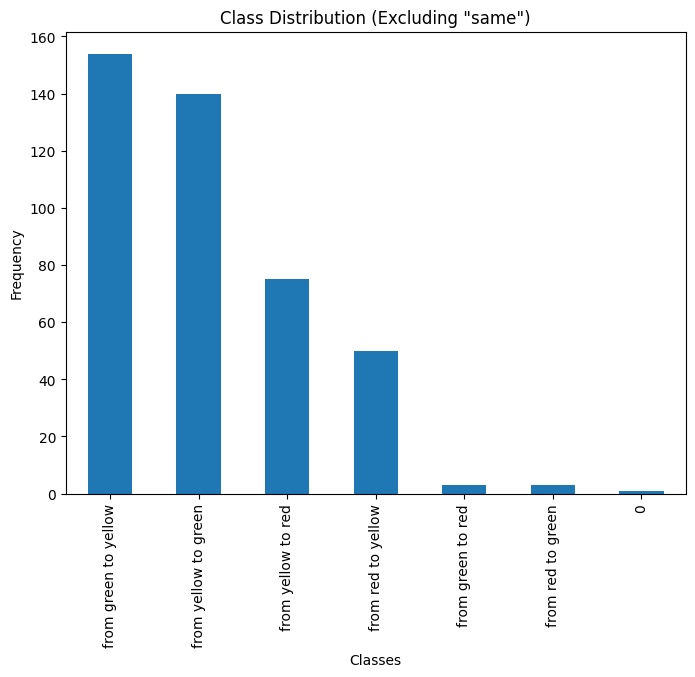

In [268]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataframe 'df' with a column 'classes'
# Replace 'df' and 'classes' with your actual dataframe and column name

# Filter out the "same" class
filtered_df = ELOM_report[ELOM_report['Relevant Category Change'] != 'same']

# Count the frequency of each class
class_counts = filtered_df['Relevant Category Change'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution (Excluding "same")')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


# # distribution of every class in Category_new_target

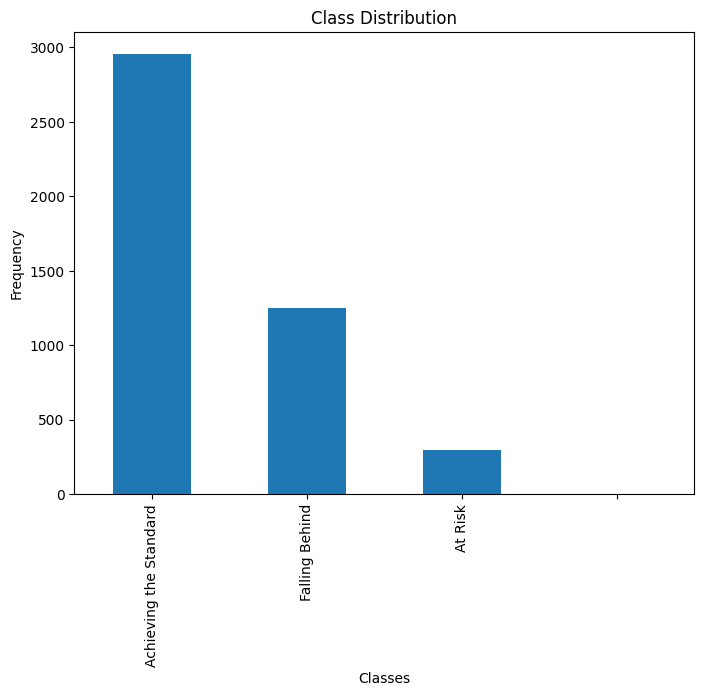

In [269]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataframe 'df' with a column 'classes'
# Replace 'df' and 'classes' with your actual dataframe and column name

# Count the frequency of each class
class_counts = ELOM_report['Category_new_target'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


# # distribution of every class in Category_current_target


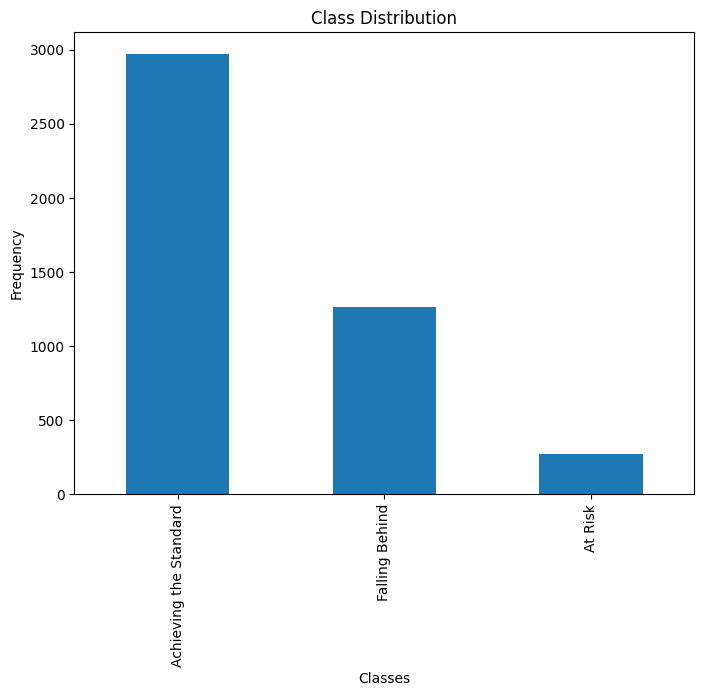

In [270]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataframe 'df' with a column 'classes'
# Replace 'df' and 'classes' with your actual dataframe and column name

# Count the frequency of each class
class_counts = ELOM_report['Category_current_target'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


In [271]:
ELOM_report.to_csv("ELOM_report_final.csv")

# Final Sensitivity Analysis Report

In [272]:
ELOM_report

Top 15 variables  current variable value  new variable value  \
0               id_enumerator            2.000300e+04        6.371200e+03   
1               id_enumerator            2.000300e+04        2.000300e+04   
2               id_enumerator            2.000300e+04        3.363480e+04   
3                   child_age            6.000000e+01        5.219067e+01   
4                   child_age            6.000000e+01        6.000000e+01   
5                   child_age            6.000000e+01        6.780933e+01   
6                   child_zha            6.450401e-01       -1.034135e+00   
7                   child_zha            6.450401e-01        6.450401e-01   
8                   child_zha            6.450401e-01        2.324216e+00   
9                child_height            1.080061e+02        9.939053e+01   
10               child_height            1.080061e+02        1.080061e+02   
11               child_height            1.080061e+02        1.166216e+02   
12                id_facility            7.620000e+02       -3.951840e+02   
13                id_facility            7.620000e+02        7.620000e+02   
14                id_facility            7.620000e+02        1.919184e+03   
15        child_observe_total            5.000000e+00        3.791400e-02   
16        child_observe_total            5.000000e+00        5.000000e+00   
17        child_observe_total            5.000000e+00        9.962086e+00   
18    teacher_emotional_total            1.001557e+01        6.309794e+00   
19    teacher_emotional_total            1.001557e+01        1.001557e+01   
20    teacher_emotional_total            1.001557e+01        1.372135e+01   
21                  longitude            2.887982e+01        2.283306e+01   
22                  longitude            2.887982e+01        2.887982e+01   
23                  longitude            2.887982e+01        3.492659e+01   
24                    id_ward            7.420104e+07        3.110462e+07   
25                    id_ward            7.420104e+07        7.420104e+07   
26                    id_ward            7.420104e+07        1.172975e+08   
27                   latitude           -2.555105e+01       -3.035573e+01   
28                   latitude           -2.555105e+01       -2.555105e+01   
29                   latitude           -2.555105e+01       -2.074637e+01   
30       teacher_social_total            1.000000e+00       -1.122316e+01   
31       teacher_social_total            1.000000e+00        1.000000e+00   
32       teacher_social_total            1.000000e+00        1.322316e+01   
33                  ward_best            4.000000e+01       -3.101175e+00   
34                  ward_best            4.000000e+01        4.000000e+01   
35                  ward_best            4.000000e+01        8.310117e+01   
36              id_facility_n            8.000000e+00       -3.740635e+00   
37              id_facility_n            8.000000e+00        8.000000e+00   
38              id_facility_n            8.000000e+00        1.974064e+01   
39                  id_ward_n            1.500000e+01       -1.125872e+01   
40                  id_ward_n            1.500000e+01        1.500000e+01   
41                  id_ward_n            1.500000e+01        4.125872e+01   
42            pri_fees_amount            3.011876e+02       -3.183694e+02   
43            pri_fees_amount            3.011876e+02        3.011876e+02   
44            pri_fees_amount            3.011876e+02        9.207446e+02   
45              id_enumerator            7.132772e+03       -6.499028e+03   
46              id_enumerator            7.132772e+03        7.132772e+03   
47              id_enumerator            7.132772e+03        2.076457e+04   
48                  child_age            6.116393e+01        5.335460e+01   
49                  child_age            6.116393e+01        6.116393e+01   
50                  child_age            6.116393e+01        6.897326e+01   
51       